# Manual 03: Optimización Max-Min
## Universidad del Norte
### Economía Matemática
Llegó la parte de **optimización** a la clase. Vamos hacer algunos ejercicios a mano primero con las funciones propias y luego si nos vamos a paquetes que permitan obtener resultados mas concretos.

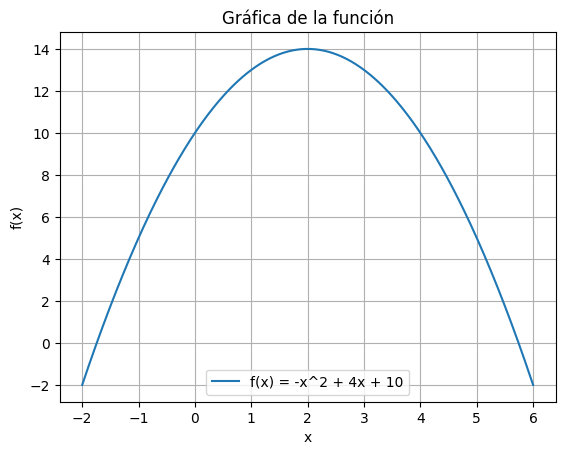

El máximo de la función se encuentra en x = 2.00000002961, y el valor máximo es f(x) = 14.0.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Definir la función
def funcion(x):
    return -x**2 + 4*x + 10

# Crear un rango de valores para x
x = np.linspace(-2, 6, 400)
y = funcion(x)

# Graficar la función
plt.plot(x, y, label='f(x) = -x^2 + 4x + 10')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función')
plt.legend()
plt.grid(True)
plt.show()

# Encontrar el máximo de la función
resultado = minimize_scalar(lambda x: -funcion(x))
maximo_x = resultado.x
maximo_y = funcion(maximo_x)

print(f"El máximo de la función se encuentra en x = {maximo_x}, y el valor máximo es f(x) = {maximo_y}.")

### Otro evento

En algunas ocasiones tambien vamos a tener funciones mas complejas

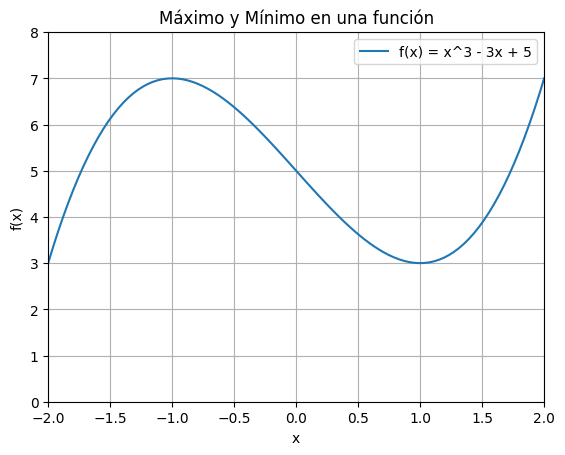

El máximo local de la función se encuentra en x = -1.0000001173307769, y el valor máximo es f(x) = 6.999999999999958.
El mínimo local de la función se encuentra en x = 1.0000001173308395, y el valor mínimo es f(x) = 3.000000000000041.


In [10]:
# Definir la función
def f(x):
    return x**3 - 3*x + 5

# Crear un rango de valores para x
x = np.linspace(-2, 2, 100)
y = f(x)

# Graficar la función
fig, ax = plt.subplots()
ax.plot(x, y, label='f(x) = x^3 - 3x + 5')
ax.set_xlim(-2, 2)
ax.set_ylim(0, 8)
ax.set_title('Máximo y Mínimo en una función')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True)
ax.legend()
plt.show()

# Máximo local de la función
resultado_max = minimize_scalar(lambda x: -f(x), bounds=(-2, 2), method='bounded')
maximo_x = resultado_max.x
maximo_y = f(maximo_x)

# Mínimo local de la función
resultado_min = minimize_scalar(f, bounds=(-2, 2), method='bounded')
minimo_x = resultado_min.x
minimo_y = f(minimo_x)

print(f"El máximo local de la función se encuentra en x = {maximo_x}, y el valor máximo es f(x) = {maximo_y}.")
print(f"El mínimo local de la función se encuentra en x = {minimo_x}, y el valor mínimo es f(x) = {minimo_y}.")

Ahora vamos con el analisis de la tradicional función de Cobb-Douglas:
$$ \max_{x_1, x_2} \quad x_1^{\alpha} x_2^{\beta} \quad \text{s.a.} \quad p_1 x_1 + p_2 x_2 = m $$

En repetidas ocasiones -*sobre todo en Microeconomía*-, se solicitaba mediante el proceso de Lagrange, hallar cada uno de los valores óptimos que máximizaban una función de utilidad y que estaba bajo una restricción especifica.

Ademas que despues de aplicar la intercepción de nuestros precios relativos con las Utilidades Marginales se lograba una ecuación que permitía incorporarse en la restricción y con ello encontrar la solución de:

$$ x_1^* = \frac{\alpha}{\alpha + \beta} \frac{m}{p_1}, \quad x_2^* = \frac{\beta}{\alpha + \beta} \frac{m}{p_2} $$

Lo anterior ampliamente conocido como <span class="rojo">Demandas Marshallianas</span>. Ya que estas eran *observables* y dependian directamente del ingreso pero inversamente de los precios de los bienes.

$$ x_1^* = \frac{\alpha m}{p_1}, \quad x_2^* = \frac{(1-\alpha) m}{p_2} $$

## Trabajo en python

La idea es entonces hacerlo en python. Para ello creemos una función

In [11]:
def Marshalliana(alpha, m, p1, p2):
    x1 = alpha * m / p1
    x2 = (1 - alpha) * m / p2
    return x1, x2

Digamos por un momento que la función tendrá los siguientes valores 
$$\alpha = 0.5, \ m = 200, \ p_1 = 7, \ p_2 = 15$$
Que es lo mismo que $x_1^* = 0.5 \times \frac{200}{7} = 14,28$ y $x_2^* = 0.5 \times \frac{200}{15} = 6,6$.

In [12]:
# Parámetros
alpha = 0.5
m = 200
p1 = 7
p2 = 15

# Haga uso de la funcióm
x1, x2 = Marshalliana(alpha, m, p1, p2)

# Dandole confort al resultado y redondeando decimales
print(f"Demanda del bien 1: {round(x1, 2)}")
print(f"Demanda del bien 2: {round(x2, 2)}")

Demanda del bien 1: 14.29
Demanda del bien 2: 6.67


### Estatica comparativa
Vamos a realizar un gráfico del bien $x_1$ y luego vamos a mirar que ocurre si aumenta un 15% el nivel de ingreso de la persona

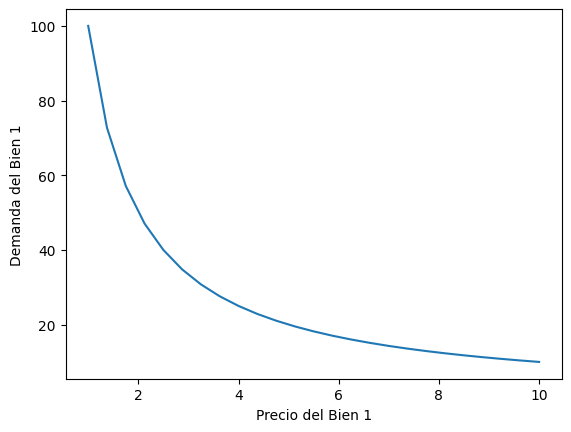

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Vector donde va los precios
p1_vals = np.linspace(1, 10, 25)

# Se resuelve por cada punto
x1_vals, x2_vals = Marshalliana(alpha, m, p1_vals, p2)

# Grafica
plt.plot(p1_vals, x1_vals)
plt.xlabel('Precio del Bien 1')
plt.ylabel('Demanda del Bien 1')
plt.show()

### Pensemos
Que ocurre si el presupuesto aumenta en un 15% $I\rightarrow 15\%$ entonces es $200 \cdot (1+0.15)= 230$. Que va ocurrir?.

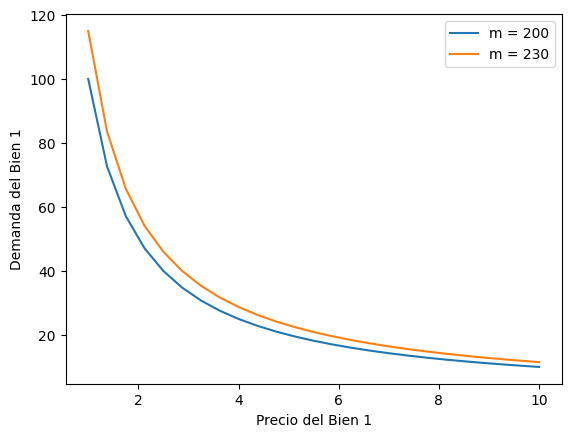

In [14]:
# Calcular la demanda cuando I = 230
x1_vals2, x2_vals2 = Marshalliana(alpha, 230, p1_vals, p2)

# Create a new plot with the second curve
plt.plot(p1_vals, x1_vals, label='m = 200')
plt.plot(p1_vals, x1_vals2, label='m = 230')
plt.xlabel('Precio del Bien 1')
plt.ylabel('Demanda del Bien 1')
plt.legend()
plt.show()

Note que la función optimiza en varios puntos al cambiar los parámetros. Intente usted cambiar al ingreso a $500 y vea como aumenta aun mas la expresión.

## Optimización Automática
llegó la hora de optimizar con una función del paquete `scipy`. Aunque aparezca `minimize`, debemos setear de tal manera que sea plausible la respuesta de nuestra función objetivo.

In [15]:
import numpy as np
from scipy.optimize import minimize

# Parameters
alpha = 0.5
m = 200
p1 = 7
p2 = 15

# Funciones de Utilidad
def utilidad(x):
    x1, x2 = x
    if x1 < 0 or x2 < 0:
        return np.inf
    else:
        return -x1 ** alpha * x2 ** (1 - alpha)

# Restricción Presupuesto
def presupuesto_c(x):
    x1, x2 = x
    return m - p1 * x1 - p2 * x2

# Consolidando las restricciones
constraints = ({"type": "eq", "fun": presupuesto_c})
initial_guess = [1, 2] 

# Aplicando la funciín -f(x) para maximizar
resultado = minimize(utilidad, initial_guess, constraints=constraints)
x1, x2 = resultado.x

# Print the results (round to 2 decimal places)
print(f"Demanda del Bien 1: {round(x1, 2)}")
print(f"Demanda del Bien 2: {round(x2, 2)}")

Demanda del Bien 1: 14.28
Demanda del Bien 2: 6.67


### Función CES

Digamos que queremos ser mas avanzados y usar dos restricciones y optimizar una función de utilidad tipo CES o (Constant Elasticity Sustitution).

$$U(x_1, x_2) = \left( x_1^\rho + x_2^\rho \right)^{\frac{1}{\rho}}$$

In [16]:
import numpy as np
from scipy.optimize import minimize

# Parámetros
rho = 0.5
m = 300
p1 = 12
p2 = 18

# Función de utilidad CES
def utilidad(x):
    x1, x2 = x
    if x1 < 0 or x2 < 0:
        return np.inf
    else:
        return -((x1 ** rho + x2 ** rho) ** (1 / rho))

# Restricción presupuestaria
def presupuesto_c(x):
    x1, x2 = x
    return m - p1 * x1 - p2 * x2

# Restricción adicional: cantidad mínima de bien 2
def restriccion_minima_bien2(x):
    x1, x2 = x
    return x2 - 3  # x2 debe ser al menos 3

# Especificación de restricciones y suposición inicial
constraints = ({"type": "eq", "fun": presupuesto_c},
               {"type": "ineq", "fun": restriccion_minima_bien2})
initial_guess = [5, 4]

# Minimización de la función de utilidad
resultado = minimize(utilidad, initial_guess, constraints=constraints)
x1, x2 = resultado.x

# Impresión de resultados (redondeados a 2 decimales)
print(f"Demanda del Bien 1: {round(x1, 2)}")
print(f"Demanda del Bien 2: {round(x2, 2)}")

Demanda del Bien 1: 15.0
Demanda del Bien 2: 6.67


### Ejercicio

1. Replique la maximización pero hagalo cuando es una demanda de bienes sustitutos.
2. ¿Cómo afecta la suposición inicial a la convergencia del algoritmo? Prueba con diferentes suposiciones iniciales como [3,4] y [6,7].

---------

________

## Otros problemas
Algunos otros problemas pueden ser resueltos desde la estructura matemática y la manera en como estan pensados.

Una **fábrica** produce cuatro productos diferentes, y que la cantidad diaria producida del primer producto es $x_2$, la cantidad producida del segundo producto es $x_2$ y así sucesivamente. El *objetivo* es determinar la cantidad de producción diaria que maximiza el beneficio para cada producto, con las siguientes restricciones,

* El beneficio por unidad de producto es de 20, 12, 30 y 15 para el primer, segundo, tercer y cuarto producto, respectivamente.

* Debido a limitaciones de mano de obra, el número total de unidades producidas al día no puede exceder de cincuenta (50).

* Por cada unidad del primer producto se consumen tres unidades de la materia prima A. Cada unidad del segundo producto requiere dos unidades de la materia prima A y una unidad de la materia prima B. Cada unidad del tercer producto necesita dos unidades de A y cinco unidades de B. Por último, cada unidad del cuarto producto requiere tres unidades de B.

* Debido a las restricciones de transporte y almacenamiento, la fábrica puede consumir hasta cien unidades de la materia prima A y noventa unidades de B al día.

El problema de programación lineal (PL) es:

\textbf{Maximizar:}
$$20x_1 + 12x_2 + 30x_3 + 15x_4$$

\textbf{Sujeto a:}
$$x_1 + x_2 + x_3 + x_4 \leq 50 \quad \text{(restricción de mano de obra)}$$
$$3x_1 + 2x_2 + 2x_3 \leq 100 \quad \text{(restricción de material A)}$$
$$x_2 + 5x_3 + 3x_4 \leq 90 \quad \text{(restricción de material B)}$$
$$x_1, x_2, x_3, x_4 \geq 0$$

In [17]:
# Función objetivo
objetivo = [-20, -12, -30, -15]

## Ingredientes
# Restricciones
valores = [[1, 1, 1, 1],
 [3, 2, 2, 0],
 [0, 1, 5, 3]]

# Vector límite
limites = [50,
      100,
      90]




In [19]:
# Optimizando
from scipy.optimize import linprog

proc_op = linprog(c=objetivo,
                 A_ub=valores,
                 b_ub=limites,
                 method = 'interior-point')

/var/folders/y7/xnq2gn1x2cs79dhd19wnj9wm0000gn/T/ipykernel_40707/4042093049.py:4: DeprecationWarning: `method='interior-point'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  proc_op = linprog(c=objetivo,


La optimización nos da:

In [20]:
proc_op

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -1033.333311303387
       x: [ 2.667e+01  1.841e-08  1.000e+01  1.333e+01]
     nit: 4

### Interpretación

El Beneficio máximo que puede tener la empresa es de $1033 diarios. Debe producir en este caso mas unidades de $x_1:26$, $x_3:10$ y de $x_4:13$. Con ello optimizaría su producción 